# demonstrate FSF forecast for 2052
on nyc

In [6]:
import numpy as np
from astropy.table import Table
from floody import data as D
from floody import floody as F

In [3]:
import corner as DFM

from matplotlib import gridspec
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline 

In [30]:
nyc = D.read_zipshape(D.CityZipcodes('newyorkcity'))

In [31]:
tbl = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.newyorkcity.v0.hdf5')

(array([58., 41., 29., 14.,  9.,  3.,  3.,  3.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  2.,  2.,  1.,  0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

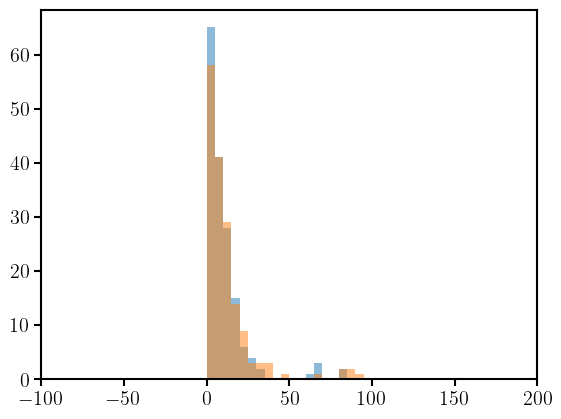

In [32]:
plt.hist(tbl['flood_risk100.2022'], range=(0, 100), bins=20, alpha=0.5)
plt.hist(tbl['flood_risk100.2052'], range=(0, 100), bins=20, alpha=0.5)

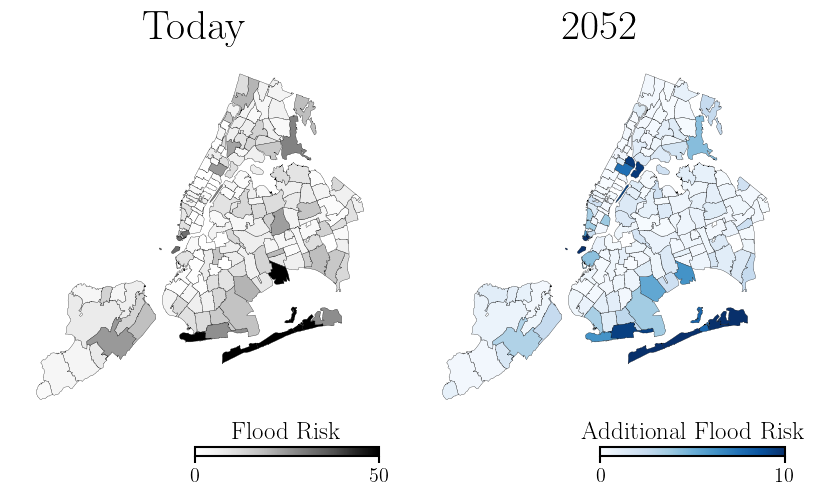

In [39]:
xlim = (-74.3, -73.675)
ylim = (40.475, 40.95)


# create map figure and axes
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0])
    
nyc['blanck'] = tbl['flood_risk100.2022']
ax = nyc.plot(column='blanck', cmap='Greys', edgecolor='k', 
                  linewidth=0.2, vmin=0., vmax=50., ax=ax, 
                  aspect=(xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
    
#ax.text(0.0, 0.5, 'Flood Risk', rotation=90., transform=ax.transAxes, ha='right', va='center', fontsize=30)
ax.set_axis_off()
ax.set_title('Today', fontsize=30)
sc = ax.scatter([], [], c=[], cmap='Greys', vmin=0., vmax=50)
cbaxes = ax.inset_axes([0.5, -0.11, 0.5, 0.025], transform=ax.transAxes) 
cbar = plt.colorbar(sc, ticks=[0, 50], cax=cbaxes, orientation='horizontal')
cbar.ax.set_title('Flood Risk', fontsize=18)
cbar.ax.set_xticklabels(['0', '50'])



ax = plt.subplot(gs[1])
nyc['blanck'] = tbl['flood_risk100.2052'] - tbl['flood_risk100.2022']
ax = nyc.plot(column='blanck', cmap='Blues', edgecolor='k', 
              linewidth=0.2, vmin=0., vmax=10., ax=ax, 
              aspect=(xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
    
ax.set_axis_off()
ax.set_title('2052', fontsize=30)

sc = ax.scatter([], [], c=[], cmap='Blues', vmin=0., vmax=10.)
cbaxes = ax.inset_axes([0.5, -0.11, 0.5, 0.025], transform=ax.transAxes) 
cbar = plt.colorbar(sc, ticks=[0, 10], cax=cbaxes, orientation='horizontal')
cbar.ax.set_title('Additional Flood Risk', fontsize=18)
cbar.ax.set_xticklabels(['0', '10'])

fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.savefig('fsf_demo.pdf', bbox_inches='tight')